# Dealing with Categorical Variables

## Introduction

You now understand the intuition behind multiple linear regression. Great! However, because you'll start digging into bigger datasets with more predictors, you'll come across predictors that are slightly different from what you've seen before. Welcome to the wondrous world of categorical variables!

## Objectives
You will be able to:
* Understand what categorical variables are
* Understand the need to create dummy variables for categorical predictors 
* Use Pandas and Scikit-Learn to create dummy variables
* Understand the dummy variable trap and how to avoid it

## The auto-mpg data

In this section, you'll see several elements of preparing data for multiple linear regression using the auto-mpg dataset, which contains technical specifications of cars. This dataset is often used by aspiring Data Scientists who want to practice linear regression with multiple predictors. Generally, the `mpg` column (for "mileage per gallion") is the dependent variable, and what we want to know is how the other columns ("predictors") in the dataset affect the mpg. Let's have a look at the data:

In [1]:
import pandas as pd
data = pd.read_csv('auto-mpg.csv')
# First convert horsepower into a string and then to int
data['horsepower'].astype(str).astype(int)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


Except for "car name", every other column seems to be a candidate predictor for miles per gallon. 

## What are categorical variables?
Now let's take a closer look at the column "origin". 

In [3]:
print(data['origin'].describe())

count    392.000000
mean       1.576531
std        0.805518
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: origin, dtype: float64


In [4]:
print(data['origin'].nunique())

3


Values range from 1 to 3, moreover, actually the only values that are in the dataset are 1, 2 and 3! it turns out that "origin" is a so-called **categorical** variable. It does not represent a continuous number but refers to a location - say 1 may stand for US, 2 for Europe, 3 for Asia (note: for this dataset the actual meaning is not disclosed).

So, categorical variables are exactly what they sound like: they represent categories instead of numerical features. 
Note that, even though that's not the case here, these features are often stored as text values which represent various levels of the observations.

## Identifying categorical variables

As categorical variables need to be treated in a particular manner, as you'll see later on, you need to make sure to identify which variables are categorical. In some cases, identifying will be easy (e.g. if they are stored as strings), in other cases they are numeric and the fact that they are categorical is not always immediately apparent.  Note that this may not be trivial. A first thing you can do is use the `.describe()` and `.info()` methods. `.describe()` will give you info on the data types (like strings, integers, etc), but even then continuous variables might have been imported as strings, so it's very important to really have a look at your data. This is illustrated in the scatter plots below.

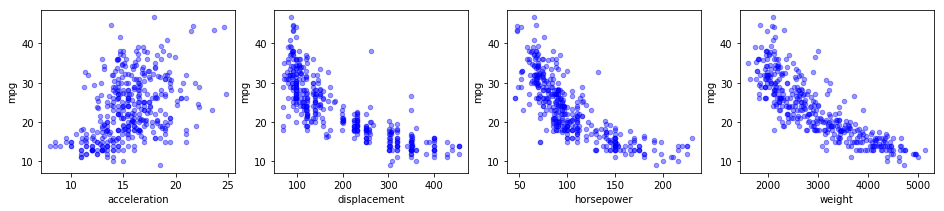

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['acceleration', 'displacement', 'horsepower', 'weight'], axes):
    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')

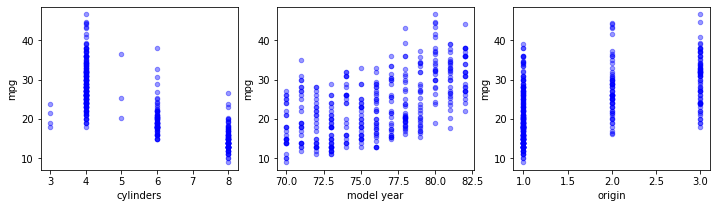

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

for xcol, ax in zip([ 'cylinders', 'model year', 'origin'], axes):
    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')

Note the structural difference between the top and bottom set of graphs. You can tell the structure looks very different: instead of getting a pretty homogeneous "cloud", categorical variables generate vertical lines for discrete values. Another plot type that may be useful to look at is the histogram.

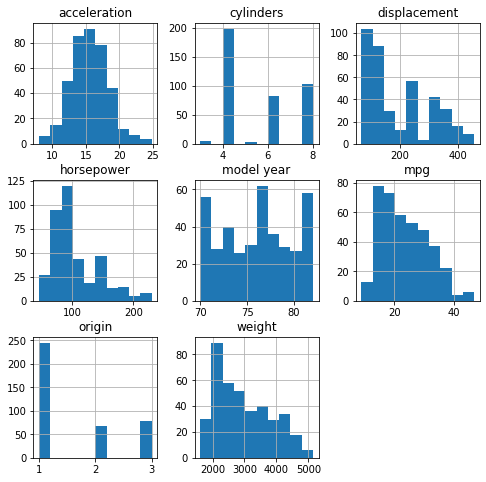

In [7]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
data.hist(ax = ax);

And the number of unique values:

In [8]:
data[['cylinders', 'model year', 'origin']].nunique()

cylinders      5
model year    13
origin         3
dtype: int64

## Transforming categorical variables

When you want to use categorical variables in regression models, they need to be transformed. There are two approaches to this:
- 1) Perform label encoding
- 2) Create dummy variables / one-hot-encoding

### Label encoding

Let's illustrate label encoding and dummy creation with the following Pandas Series with 3 categories: "USA", "EU" and "ASIA".

In [9]:
origin = ['USA', 'EU', 'EU', 'ASIA','USA', 'EU', 'EU', 'ASIA', 'ASIA', 'USA']
origin_series = pd.Series(origin)

Now you'll want to make sure Python recognizes there strings as categories. This can be done as follows:

In [10]:
cat_origin = origin_series.astype('category')
cat_origin

0     USA
1      EU
2      EU
3    ASIA
4     USA
5      EU
6      EU
7    ASIA
8    ASIA
9     USA
dtype: category
Categories (3, object): [ASIA, EU, USA]

Note how the `dtype` (i.e., data type) here is `category` and the three categories are detected.

Sometimes you'll want to represent your labels as numbers. This is called label encoding.

You'll perform label encoding in a way that numerical labels are always between 0 and (number_of_categories)-1. There are several ways to do this, one way is using `.cat.codes`

In [11]:
cat_origin.cat.codes

0    2
1    1
2    1
3    0
4    2
5    1
6    1
7    0
8    0
9    2
dtype: int8

Another way is to use scikit-learn's `LabelEncoder`:

In [12]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

origin_encoded = lb_make.fit_transform(cat_origin)

In [13]:
origin_encoded

array([2, 1, 1, 0, 2, 1, 1, 0, 0, 2])

Note that while `.cat.codes` can only be used on variables that are transformed using `.astype(category)`, this is not a requirement to use `LabelEncoder`.

### Creating Dummy Variables

Another way to transform categorical variables is through using one-hot encoding or "dummy variables". The idea is to convert each category into a new column, and assign a 1 or 0 to the column. There are several libraries that support one-hot encoding, let's take a look at two:

In [14]:
pd.get_dummies(cat_origin)

,ASIA,EU,USA
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,0,0,1


See how the label name has become the column name! Another method is through using the `LabelBinarizer` in scikit-learn. 

In [15]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
origin_dummies = lb.fit_transform(cat_origin)
# You need to convert this back to a dataframe
origin_dum_df = pd.DataFrame(origin_dummies,columns=lb.classes_)
origin_dum_df

,ASIA,EU,USA
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,0,0,1


The advantage of using dummies is that, whatever algorithm you'll be using, your numerical values cannot be misinterpreted as being continuous. Going forward, it's important to know that for linear regression (and most other algorithms in scikit-learn), **one-hot encoding is required** when adding categorical variables in a regression model!

## The Dummy Variable Trap

Due to the nature of how dummy variables are created, one variable can be predicted from all of the others. This is known as perfect **multicollinearity** and it can be a problem for regression. Multicollinearity will be covered in depth later but the basic idea behind perfect multicollinearity is that you can *perfectly* predict what one variable will be using some combination of the other variables. If this isn't super clear, go back to the one-hot encoded origin data above:

In [16]:
trap_df = pd.get_dummies(cat_origin)
trap_df

,ASIA,EU,USA
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,0,0,1


As a consequence of creating dummy variables for every origin, you can now predict any single origin dummy variable using the information from all of the others. OK, that might sound more like a tongue twister than an explanation so focus on the ASIA column for now. You can perfectly predict this column by adding the values in the EU and USA columns then subtracting the sum from 1 as shown below:

In [17]:
# Predict ASIA column from EU and USA
predicted_asia = 1 - (trap_df['EU'] + trap_df['USA'])
predicted_asia.to_frame(name='Predicted_ASIA')

,Predicted_ASIA
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,1
9,0


EU and USA can be predicted in a similar manner which you can work out on your own. 

You are probably wondering why this is a problem for regression. Recall that the coefficients derived from a regression model are used to make predictions. In a multiple linear regression, the coefficients represent the average change in the dependent variable for each 1 unit change in a predictor variable, assuming that all the other predictor variables are kept constant. This is no longer the case when predictor variables are related which, as you've just seen, happens automatically when you create dummy variables. This is what is known as the **Dummy Variable Trap**.

Fortunately, the dummy variable trap can be avoided by simply dropping one of the dummy variables. You can do this by subsetting the dataframe manually or, more conveniently, by passing ```drop_first=True``` to ```get_dummies()```: 

In [18]:
pd.get_dummies(cat_origin, drop_first=True)

,EU,USA
0,0,1
1,1,0
2,1,0
3,0,0
4,0,1
5,1,0
6,1,0
7,0,0
8,0,0
9,0,1


If you take a close look at the DataFrame above, you'll see that there is no longer enough information to predict any of the columns so the multicollinearity has been eliminated. 

You'll soon see that dropping the first variable affects the interpretation of regression coefficients. The dropped category becomes what is known as the **reference category**. The regression coefficients that result from fitting the remaining variables represent the change *relative* to the reference.

You'll also see that in certain contexts, multicollinearity and the dummy variable trap are less of an issue and can be ignored. It is therefore important to understand which models are sensitive to multicollinearity and which are not.

## Back to our auto-mpg data

Let's go ahead and change our "cylinders", "model year", and "origin" columns over to dummies and drop the first variable.

In [19]:
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)

Next, let's remove the original columns from our data and add the dummy columns instead

In [20]:
data = data.drop(['cylinders','model year','origin'], axis=1)

In [21]:
data = pd.concat([data, cyl_dummies, yr_dummies, orig_dummies], axis=1)
data.head()

,mpg,displacement,horsepower,weight,acceleration,car name,cyl_4,cyl_5,cyl_6,cyl_8,...,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,orig_2,orig_3
0,18.0,307.0,130,3504,12.0,chevrolet chevelle malibu,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165,3693,11.5,buick skylark 320,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150,3436,11.0,plymouth satellite,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150,3433,12.0,amc rebel sst,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140,3449,10.5,ford torino,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Summary
Great! In this lesson, you learned about categorical variables, and how to include them in your multiple linear regression model using label encoding or dummy variables. You also learned about the dummy variable trap and how it can be avoided.